In [1]:
!pip install diffusers transformers accelerate torch


In [2]:
import torch
import os
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


Using device: cuda


In [4]:
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [5]:
output_dir = "synthetic_dataset"
os.makedirs(output_dir, exist_ok=True)

print("Dataset folder created:", output_dir)


Dataset folder created: synthetic_dataset


In [8]:
prompts = [
    "A high-renaissance oil painting by Leonardo da Vinci of a futuristic astronaut sitting on a lunar rock. The astronaut is wearing ornate, gold-filigree armor instead of a spacesuit. He is holding a glowing, holographic skull. In the background, Earth is seen rising, but it is shaped like a giant clockwork gear. Sfumato technique, cracked canvas texture, dramatic chiaroscuro lighting.",
    "A wide-angle cinematic shot of a metropolis where the buildings are made of giant, iridescent peacock feathers and translucent jellyfish membranes. Pulse-lines of neon violet bioluminescence flow through the streets like veins. Tiny flying boats made of carved opal drift between the towers. Hyper-realistic, 8k, ethereal atmosphere, macro photography style.",
    "A vast desert where the sand is made of pulverized tiny diamonds. Towering giant hourglasses are buried halfway in the dunes, and instead of sand, they are leaking liquid gold that turns into butterflies as it hits the ground. The sky is a deep emerald green with three different colored suns. Style of Salvador Dalí mixed with modern 3D octane render.",
    "An ancient Japanese samurai warrior whose body is disintegrating into digital pixels and cherry blossom petals. He is standing in a rainstorm where the raindrops are glowing binary code. His katana is made of pure white light that cuts through the fabric of reality, revealing a starry nebula behind the tear. Volumetric lighting, cyberpunk aesthetics, high contrast",
    "An extreme close-up of a vintage pocket watch that has been opened to reveal a tiny, bustling Victorian village inside the gears. Miniature steam engines puff real smoke, and tiny people with umbrellas walk along the brass cogs. The lighting is warm candlelight, casting long shadows. Macro lens, shallow depth of field, steampunk, incredibly intricate metalwork"
]


In [16]:
num_inference_steps = 150
guidance_scale = 8.0
height = 512
width = 512

generator = torch.Generator(device=device).manual_seed(42)


In [17]:
generated_images = []

for i, prompt in enumerate(prompts):
    result = pipe(
        prompt=prompt,
        height=height,
        width=width,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator
    )

    image = result.images[0]
    image_path = f"{output_dir}/image_{i+1}.png"
    image.save(image_path)
    generated_images.append(image)

    print(f"Saved: {image_path}")


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['canvas texture , dramatic chiaroscuro lighting .']


  0%|          | 0/150 [00:00<?, ?it/s]

Saved: synthetic_dataset/image_1.png


  0%|          | 0/150 [00:00<?, ?it/s]

Saved: synthetic_dataset/image_2.png


  0%|          | 0/150 [00:00<?, ?it/s]

Saved: synthetic_dataset/image_3.png


  0%|          | 0/150 [00:00<?, ?it/s]

Saved: synthetic_dataset/image_4.png


  0%|          | 0/150 [00:00<?, ?it/s]

Saved: synthetic_dataset/image_5.png


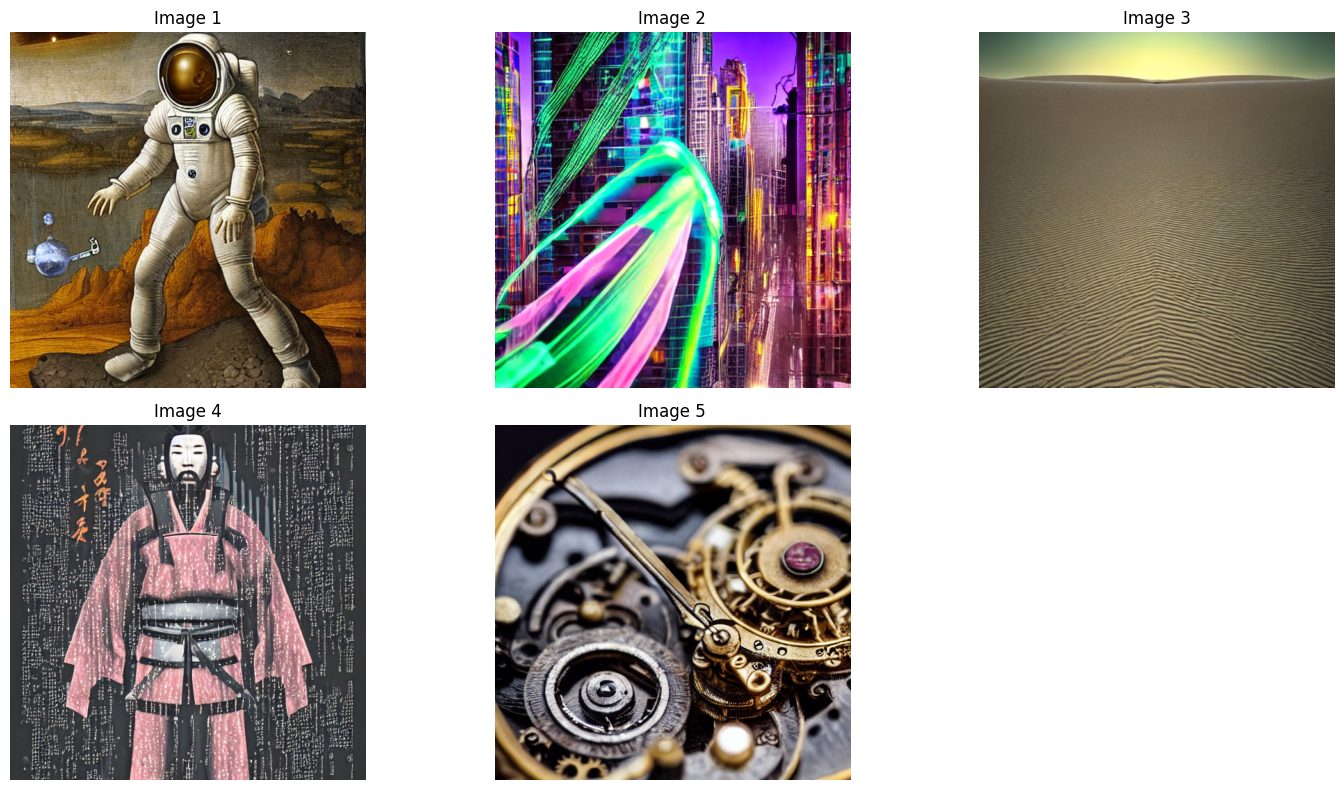

In [18]:
plt.figure(figsize=(15, 8))

for i, img in enumerate(generated_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Image {i+1}")

plt.tight_layout()
plt.show()
